In [2]:
# Step 1: Mounting to yoru own Google Colab drive
from google.colab import drive
drive.mount('/gdrive')

ModuleNotFoundError: No module named 'google'

In [3]:
# Step 2: Set the directory of the datasets as the current
%cd '/gdrive/MyDrive/ML'

[WinError 3] The system cannot find the path specified: "'/gdrive/MyDrive/ML'"
C:\Users\uSer\AndroidStudioProjects\titanic_python


C:\Users\uSer\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [4]:
# Step 3: Install specific analysis packages
!pip install ydata_profiling

In [5]:
# Step 4: Import the following libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Step 3: Install specific analysis packages
!pip install --upgrade scikit-learn
!pip install -U imbalanced-learn


In [7]:
# Step 4: Import the following libraries
import pandas as pd
import numpy as np
from numpy import mean, std
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler # Import the OrdinalEncoder class from sklearn.preprocessing
from sklearn.decomposition import PCA # Import the PCA class from sklearn.decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline # Import the Pipeline class from sklearn.pipeline
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


In [8]:
# Step 5: Create a sample DataFrame with 10 rows and 110 columns filled with random numbers
# Write your code here
num_rows = 10  # Number of rows
num_cols = 110  # Number of columns
data = np.random.rand(num_rows, num_cols)  # Generate random data
df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(num_cols)])  # Create DataFrame


In [9]:
# Step 6: Print the DataFrame
# Write your code here
print(df)

      col_0     col_1     col_2     col_3     col_4     col_5     col_6  \
0  0.812977  0.462629  0.404920  0.109004  0.340017  0.335716  0.073079   
1  0.587197  0.639976  0.406376  0.276543  0.454821  0.287827  0.879051   
2  0.816579  0.238559  0.244788  0.560392  0.924357  0.129839  0.986526   
3  0.350610  0.659474  0.577023  0.147502  0.968810  0.854173  0.372683   
4  0.776233  0.181700  0.424375  0.925643  0.439218  0.120795  0.839273   
5  0.214602  0.430939  0.292913  0.185385  0.482914  0.725268  0.968539   
6  0.458026  0.207546  0.043141  0.827090  0.214290  0.918992  0.349900   
7  0.645912  0.225364  0.306180  0.381427  0.986134  0.930863  0.972314   
8  0.060220  0.383285  0.802045  0.366723  0.122167  0.580930  0.098737   
9  0.784750  0.235353  0.160009  0.783694  0.544864  0.128571  0.029921   

      col_7     col_8     col_9  ...   col_100   col_101   col_102   col_103  \
0  0.261384  0.321773  0.614856  ...  0.321465  0.353101  0.130983  0.052310   
1  0.022651  0

In [10]:
# Step 7: Set the maximum number of columns to display
# Write your code here
pd.set_option('display.max_columns', 10)
print(df)

      col_0     col_1     col_2     col_3     col_4  ...   col_105   col_106  \
0  0.812977  0.462629  0.404920  0.109004  0.340017  ...  0.454346  0.520635   
1  0.587197  0.639976  0.406376  0.276543  0.454821  ...  0.339994  0.936202   
2  0.816579  0.238559  0.244788  0.560392  0.924357  ...  0.808222  0.022493   
3  0.350610  0.659474  0.577023  0.147502  0.968810  ...  0.667339  0.490187   
4  0.776233  0.181700  0.424375  0.925643  0.439218  ...  0.307450  0.010496   
5  0.214602  0.430939  0.292913  0.185385  0.482914  ...  0.930724  0.634972   
6  0.458026  0.207546  0.043141  0.827090  0.214290  ...  0.416950  0.893301   
7  0.645912  0.225364  0.306180  0.381427  0.986134  ...  0.515918  0.402987   
8  0.060220  0.383285  0.802045  0.366723  0.122167  ...  0.032414  0.731074   
9  0.784750  0.235353  0.160009  0.783694  0.544864  ...  0.086532  0.348843   

    col_107   col_108   col_109  
0  0.550391  0.760187  0.199866  
1  0.286176  0.847632  0.978234  
2  0.709154  0.04

What do you notice about the DataFrame output before and after setting the display option?

Why is it beneficial to adjust the display settings when working with large datasets?

We will now start working with the Porte Seguro's dataset for safe driver prediction. Download the train.csv and test.csv files from Blackboard and upload to Google Drive.

In [11]:
# Step 8: Load the training and data from 'train.csv'
# Write your code here
train = pd.read_csv('train.csv')

In [12]:
# Step 9: Load the testing data from 'test.csv'
# Write your code here
test=pd.read_csv('test.csv')

In [13]:
# Step 10: Display the first few rows of the training data
# Write your code here
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,...,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,...,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,...,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,...,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,...,0,237736,30.0708,NaN,C


# Exploratory Data Analysis

In [14]:
# Step 11: Display the last few rows of the training data
#Write your code here
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,...,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,...,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,...,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,...,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,...,0,370376,7.75,NaN,Q


In [15]:
# Step 12: Get a concise summary of the training data, including essential information about the DataFrame's structure, overall layout and data types.
# Write your code here
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observation:


*   We see that the data type is integer or float.
*   No null values are present in the train dataset. That's normal, because missing values are replaced by -1.



In [17]:
# Step 13: Display the number of rows and columns in the training and testing data.
#Write your code here.
print("Train dataset (rows, cols):",train.shape, "\nTest dataset (rows, cols):",test.shape)

Train dataset (rows, cols): (891, 12) 
Test dataset (rows, cols): (418, 11)


In [19]:
##See the unique value
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [21]:
### View the survival accordingto the classes
train.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [22]:
### View the survival accordingto the classes
train.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [25]:
### View the survival accordingto the classes
train.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [26]:
### View the survival accordingto the classes
train.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [29]:
### Creating family size

train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
test['Family_Size'] = train['SibSp'] + train['Parch'] + 1

In [30]:
### As family column is create now in the dataset Lets Looking into thesurvival rate of family member

train.groupby(['Family_Size'], as_index=False)['Survived'].mean()


,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [31]:
## So we can see the rate of family survival from above and parse the category accordingly.So, lets connnect it with giving key to each size of the family
dict_family =  {1: 'A', 2: 'S', 3: 'S', 4: 'S', 5: 'M', 6: 'M', 7: 'L', 8: 'L', 11: 'L'}

train['Family_Size_Group'] = train['Family_Size'].map(dict_family)
test['Family_Size_Group'] = train['Family_Size'].map(dict_family)

In [33]:
train.groupby(['Family_Size_Group'], as_index=False)['Survived'].mean()

,Family_Size_Group,Survived
0,A,0.303538
1,L,0.160000
2,M,0.162162
3,S,0.578767


In [34]:
### lets take look at embarked mow
train.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


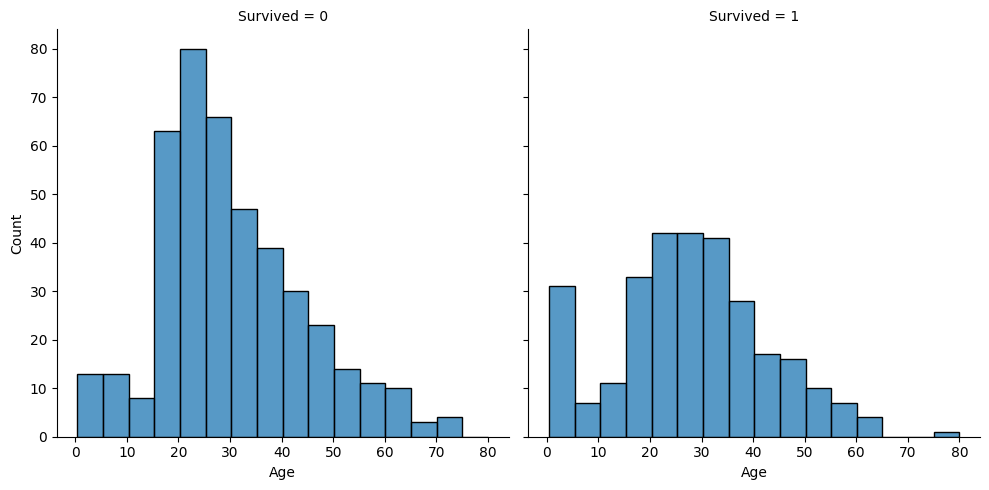

In [35]:
##let view detail in graph

sns.displot(train, x = 'Age', col= 'Survived', binwidth=5, height =5)

In [36]:
### let parse age arrange them according to parsed in  the graph

train['Age_Parse'] = pd.qcut(train['Age'], 5)
test['Age_Parse'] = pd.qcut(test['Age'], 5)

In [37]:
### Let see the age parse

train.groupby(['Age_Parse'], as_index=False)['Survived'].mean()

C:\Users\uSer\AppData\Local\Temp\ipykernel_10204\387108593.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(['Age_Parse'], as_index=False)['Survived'].mean()


,Age_Parse,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [41]:
## lets assgign age in more systematic order as from above data age seems to be from .4 to 80

train.loc[train['Age'] <= 19, 'Age'] = 0
train.loc[(train['Age'] > 19) & (train['Age'] <= 25), 'Age'] = 1
train.loc[(train['Age'] > 25) & (train['Age'] <= 31.8), 'Age'] = 2
train.loc[(train['Age'] > 31.8) & (train['Age'] <= 41), 'Age'] = 3
train.loc[(train['Age'] > 41) & (train['Age'] <= 80), 'Age'] = 4
train.loc[train['Age'] > 80, 'Age'] 

test.loc[test['Age'] <= 19, 'Age'] = 0
test.loc[(test['Age'] > 19) & (test['Age'] <= 25), 'Age'] = 1
test.loc[(test['Age'] > 25) & (test['Age'] <= 31.8), 'Age'] = 2
test.loc[(test['Age'] > 31.8) & (test['Age'] <= 41), 'Age'] = 3
test.loc[(test['Age'] > 41) & (test['Age'] <= 80), 'Age'] = 4
test.loc[test['Age'] > 80, 'Age'] 

Series([], Name: Age, dtype: float64)

In [45]:
train['Age']

0      1.0
1      3.0
2      2.0
3      3.0
4      3.0
      ... 
886    2.0
887    0.0
888    NaN
889    2.0
890    3.0
Name: Age, Length: 891, dtype: float64

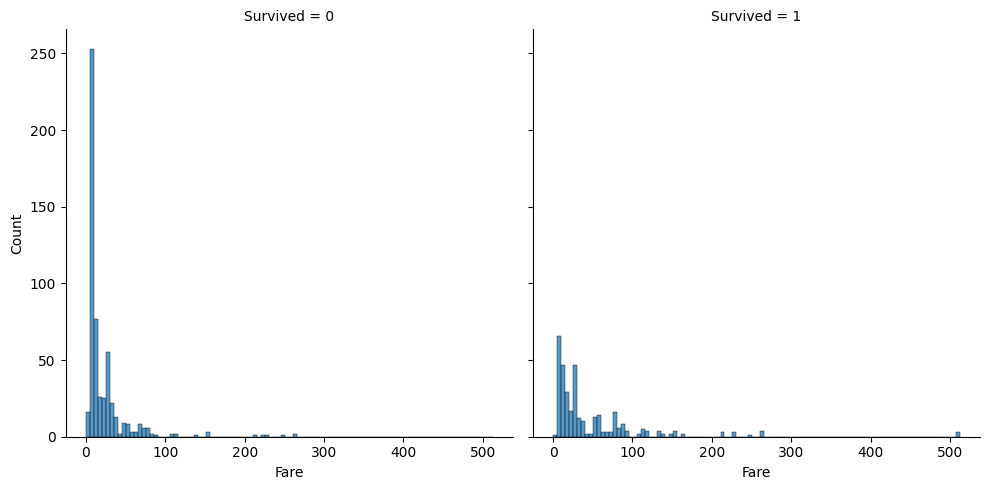

In [47]:
##let view detail in graph

sns.displot(train, x = 'Fare', col= 'Survived', binwidth=5, height =5)

In [50]:
### let parse age arrange them according to parsed in  the graph

train['Fare_Parse'] = pd.qcut(train['Fare'], 8)
test['Fare_Parse'] = pd.qcut(test['Fare'], 8)

In [51]:
train.groupby(['Fare_Parse'], as_index=False)['Survived'].mean()

C:\Users\uSer\AppData\Local\Temp\ipykernel_10204\3258343036.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(['Fare_Parse'], as_index=False)['Survived'].mean()


,Fare_Parse,Survived
0,"(-0.001, 7.75]",0.207143
1,"(7.75, 7.91]",0.180723
2,"(7.91, 9.841]",0.198198
3,"(9.841, 14.454]",0.407080
4,"(14.454, 24.479]",0.436364
5,"(24.479, 31.0]",0.473214
6,"(31.0, 69.488]",0.481818
7,"(69.488, 512.329]",0.678571


In [52]:
train.loc[train['Fare'] <= 7.854, 'Fare'] = 0
train.loc[(train['Fare'] > 7.854) & (train['Fare'] <= 10.5), 'Fare'] = 1
train.loc[(train['Fare'] > 10.5) & (train['Fare'] <= 21.679), 'Fare'] = 2
train.loc[(train['Fare'] > 21.679) & (train['Fare'] <= 39.688), 'Fare'] = 3
train.loc[(train['Fare'] > 39.688) & (train['Fare'] <= 512.329), 'Fare'] = 4
train.loc[train['Fare'] > 512.329, 'Fare'] 

test.loc[test['Fare'] <= 7.854, 'Fare'] = 0
test.loc[(test['Fare'] > 7.854) & (test['Fare'] <= 10.5), 'Fare'] = 1
test.loc[(test['Fare'] > 10.5) & (test['Fare'] <= 21.679), 'Fare'] = 2
test.loc[(test['Fare'] > 21.679) & (test['Fare'] <= 39.688), 'Fare'] = 3
test.loc[(test['Fare'] > 39.688) & (test['Fare'] <= 512.329), 'Fare'] = 4
test.loc[test['Fare'] > 512.329, 'Fare'] 

343    512.3292
Name: Fare, dtype: float64

In [53]:
## Lets take a peaking on name column now

train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [54]:
### NOW lets take the title out from the name doing string split 

train['Title'] = train['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())
test['Title'] = test['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())


In [55]:
train.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [56]:
### So we can lots of different value apart form miss/mrs/mr. Thus, lets try to arrange these variable in categorical way using Hashmap/Dictionary

train['Title'] = train['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})

test['Title'] = test['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})



In [57]:
train.groupby(['Title'],as_index=False)['Survived'].agg(['count','mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [59]:
### We can also view that the lenght of the name had also differtiatied the class of the person as they added some what in with the names. Let look at their name now

train['Name_Length'] = train['Name'].apply(lambda x: len(x))
test['Name_Length'] = test['Name'].apply(lambda x: len(x))




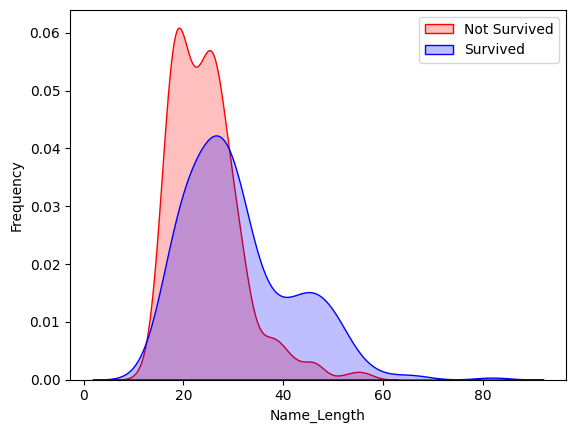

In [60]:
### Now lets plot the name_lengthin graph


g = sns.kdeplot(train['Name_Length'][(train['Survived']==0) & (train['Name_Length'].notnull())], color='Red', fill=True)
g = sns.kdeplot(train['Name_Length'][(train['Survived']==1) & (train['Name_Length'].notnull())], ax=g, color='Blue', fill=True)
g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])


In [61]:
## As we can see from above graph person having longer username survived. Thus rearrange the name_length now


train['Name_Length_Parsing'] =pd.qcut(train['Name_Length'], 8)
test['Name_Length_Parsing'] =pd.qcut(train['Name_Length'], 8)

In [62]:
train.groupby(['Name_Length_Parsing'], as_index=False)['Survived'].mean()

C:\Users\uSer\AppData\Local\Temp\ipykernel_10204\1727326201.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(['Name_Length_Parsing'], as_index=False)['Survived'].mean()


,Name_Length_Parsing,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [66]:
train.loc[train['Name_Length'] <= 22, 'Name_Size'] = 0
train.loc[(train['Name_Length'] > 22) & (train['Name_Length'] <= 28), 'Name_Size'] = 1
train.loc[(train['Name_Length'] > 28) & (train['Name_Length'] <= 82), 'Name_Size'] = 2
train.loc[train['Name_Length'] > 82, 'Name_Size'] 

test.loc[test['Name_Length'] <= 22, 'Name_Size'] = 0
test.loc[(test['Name_Length'] > 22) & (test['Name_Length'] <= 28), 'Name_Size'] = 1
test.loc[(test['Name_Length'] > 28) & (test['Name_Length'] <= 82), 'Name_Size'] = 2
test.loc[test['Name_Length'] > 82, 'Name_Size'] 

Series([], Name: Name_Size, dtype: float64)

In [67]:
## Now lets take a deep dive into ticket

train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [69]:
### let split up ticket number inorder from backside as we can see from the data the ticket no is not in order or deosnot have simultanenous range of value.

train['TicketNumber'] = train['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test['TicketNumber'] = test['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [70]:
### let do groupby with count to see of there multiple ticket numbers here

train.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumber,count,mean
196,2343,7,0.000000
464,347082,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
674,8475,1,0.000000
675,851,1,0.000000
676,9234,1,1.000000
63,11769,1,1.000000


In [74]:
### let count the number of ticket 

train['Ticket'].str.split(pat=" ", expand=True)


,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [75]:
### let analyse the ticket fromthe front which is in discrete order

train['TicketLocation'] = np.where(train['Ticket'].str.split(pat=" ", expand=True)[1].notna(), train['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')
test['TicketLocation'] = np.where(test['Ticket'].str.split(pat=" ", expand=True)[1].notna(), test['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [76]:
train['TicketLocation'].value_counts()

TicketLocation
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
A/5.            7
SOTON/OQ        7
STON/O2.        6
CA              6
C               5
S.O.C.          5
SC/PARIS        5
F.C.C.          5
SC/Paris        4
A/4.            3
PP              3
A/4             3
S.O./P.P.       3
SC/AH           3
A./5.           2
P/PP            2
A.5.            2
WE/P            2
SOTON/O2        2
S.C./PARIS      2
S.C./A.4.       1
Fa              1
S.O.P.          1
SO/C            1
S.P.            1
A4.             1
W.E.P.          1
A/S             1
SC              1
SW/PP           1
SCO/W           1
W/C             1
S.W./PP         1
F.C.            1
C.A./SOTON      1
Name: count, dtype: int64

In [77]:
train['TicketLocation'] = train['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})

test['TicketLocation'] = test['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})

In [78]:
### Lets do group to see in order

train.groupby(['TicketLocation'], as_index=False)['Survived'].agg(['count', 'mean'])


,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


In [81]:
train['Cabin'] = train['Cabin'].fillna('U')
train['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train['Cabin']])

test['Cabin'] = test['Cabin'].fillna('U')
test['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test['Cabin']])


In [82]:
### Let group by this place

train.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])


,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [85]:
### Let passenger has cabin or not
train['Has_Cabin'] = train['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test['Has_Cabin'] = test['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [90]:
train.groupby(['Has_Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])


,Has_Cabin,count,mean
0,0,687,0.299854
1,1,204,0.666667


## Missing Values

In [91]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

C:\Users\uSer\AppData\Local\Temp\ipykernel_10204\3740151452.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean(), inplace=True)
C:\Users\uSer\AppData\Local\Temp\ipykernel_10204\3740151452.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [93]:


from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

encode = OneHotEncoder(sparse_output=False)
oEncoder = OrdinalEncoder
imputer = SimpleImputer(strategy='most_frequent')

In [94]:
oEncoder_cols = ['Family_Size_Grouped']
encode_cols = ['Sex', 'Embarked']

<Axes: >

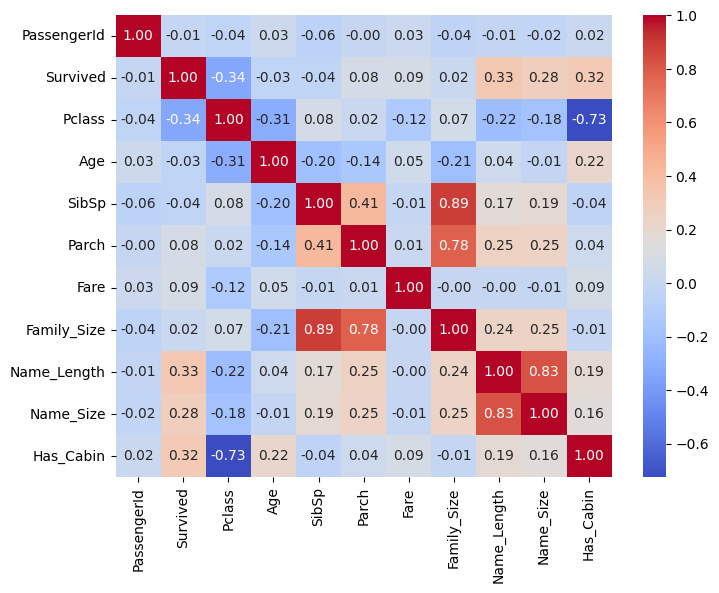

In [96]:
correlation_matrix = train.corr(numeric_only=True)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [99]:
#new
X = train.drop(['Survived', 'SibSp', 'Parch'], axis=1)
y = train['Survived']
X_test = test.drop(['Age_Parse', 'Age_Parse', 'SibSp', 'Parch'], axis=1)

KeyError: "['Age_Parse', 'Age_Parse'] not found in axis"

In [100]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify = y, random_state=21)

NameError: name 'train_test_split' is not defined

# Pipeline

In [101]:
#### Build ordinal and One hot encoder pipe line

In [102]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [103]:
Oencoder_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))
])

In [104]:
col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
   # ('passthrough', 'passthrough', ['Pclass', 'TicketNumberCounts', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare'])
     ('passthrough', 'passthrough', ['Pclass', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare', 'TicketNumberCounts'])
    ],
    remainder='drop',
    n_jobs=-1)

NameError: name 'ColumnTransformer' is not defined

In [105]:
rfc = RandomForestClassifier()

In [106]:
param_grid = {
    'n_estimators': [150, 200, 300, 500],
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 13, 15, 17, 20],
    'min_samples_leaf': [2, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))


In [107]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

NameError: name 'make_pipeline' is not defined

In [ ]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

In [ ]:
dtc = DecisionTreeClassifier()


In [ ]:
param_grid = {
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [ ]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))


In [ ]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

In [ ]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

In [ ]:
knn = KNeighborsClassifier()


In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2],
}

In [ ]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)

In [ ]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

In [ ]:
svc = SVC(probability=True)

In [ ]:
param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
}

In [ ]:
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, y_train)

In [ ]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

In [ ]:
lr = LogisticRegression()

In [ ]:
param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
}

In [ ]:
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinallr= make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

In [ ]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

In [ ]:
gnb = GaussianNB()

In [ ]:
param_grid = {
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001],
}

In [ ]:
CV_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinalgnb= make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train, y_train)

In [ ]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

In [ ]:
xg = XGBClassifier()

In [ ]:
param_grid = {
     'booster': ['gbtree', 'gblinear','dart'],
}

In [ ]:
CV_xg = GridSearchCV(estimator=xg, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinalxg= make_pipeline(col_trans, CV_xg)
pipefinalxg.fit(X_train, y_train)

In [ ]:
print(CV_xg.best_params_)
print(CV_xg.best_score_)

In [ ]:
abc = AdaBoostClassifier()

In [ ]:
dtc_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=10,min_samples_leaf=4, min_samples_split=10)  
svc_2 = SVC(probability=True, C=10, kernel='rbf') 
lr_2 = LogisticRegression(C=0.1) 
lr_3 = LogisticRegression(C=0.2) 
lr_4 = LogisticRegression(C=0.05) 

In [ ]:
param_grid = {
    'estimator': [dtc_2, svc_2, lr_2], 
    'n_estimators':  [5, 10, 25, 50, 100],
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': [(0.97 + x / 100) for x in range(1, 7)]  
}

In [ ]:
CV_abc = GridSearchCV(estimator=abc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinalabc= make_pipeline(col_trans, CV_abc)
pipefinalabc.fit(X_train, y_train)

In [ ]:
print(CV_abc.best_params_)
print(CV_abc.best_score_)


In [ ]:
etc = ExtraTreesClassifier()

In [ ]:
param_grid = {
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "n_estimators" :[100,300],
}

In [ ]:
CV_etc = GridSearchCV(estimator=etc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))


In [ ]:
pipefinaletc= make_pipeline(col_trans, CV_etc)
pipefinaletc.fit(X_train, y_train)

In [ ]:
print(CV_etc.best_params_)
print(CV_etc.best_score_)

In [ ]:
GBC = GradientBoostingClassifier()

In [ ]:
param_grid = {
              'n_estimators' : [300, 400, 500],
              'learning_rate': [ 0.1, 0.3, 0.6, 1.0],
              'max_depth': [8, 10, 12],
              'min_samples_leaf': [50, 100, 120, 150],
              'max_features': [0.1, 0.3, 0.5] 
              }

In [ ]:
CV_gbc = GridSearchCV(estimator=GBC, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))


In [ ]:
pipefinalgbc= make_pipeline(col_trans, CV_gbc)
pipefinalgbc.fit(X_train, y_train)

In [ ]:
print(CV_gbc.best_params_)
print(CV_gbc.best_score_)

In [ ]:
vc1 = VotingClassifier([('gbc', CV_gbc.best_estimator_),
                        ('etc', CV_etc.best_estimator_),
                          ('nb', CV_gnb.best_estimator_)
                         ], voting='hard', weights=[1,2,3] )

In [ ]:
vc2 = VotingClassifier([('abc', CV_abc.best_estimator_),
                        ('etc', CV_etc.best_estimator_),
                          ('nb', CV_gnb.best_estimator_)
                         ], voting='hard', weights=[1,2,3] )

In [ ]:
pipefinalcv1 = make_pipeline(col_trans, vc1)

In [ ]:
pipefinalcv1 = make_pipeline(col_trans, vc1)

In [ ]:
pipefinalcv1.fit(X_train, y_train)

In [ ]:
pipefinalcv2.fit(X_train, y_train)

In [ ]:
Y_pred = pipefinalrfc.predict(X_test)
Y_pred2 = pipefinaldtc.predict(X_test)
Y_pred3 = pipefinalknn.predict(X_test)
Y_pred4 = pipefinalsvc.predict(X_test)
Y_pred5 = pipefinallr.predict(X_test)
Y_pred6 = pipefinalgnb.predict(X_test)
Y_pred7 = pipefinalxg.predict(X_test)
Y_pred8 = pipefinalabc.predict(X_test)
Y_pred9 = pipefinaletc.predict(X_test)
Y_pred10 = pipefinalgbc.predict(X_test)
Y_pred11 = pipefinalcv1.predict(X_test)
Y_pred12 = pipefinalcv2.predict(X_test)